In [98]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense, Dropout

from sklearn.model_selection import train_test_split

import seaborn as sns

pd.set_option('display.max_rows', 3000)
# pd.reset_option('display.max_rows')

In [2]:
train_raw = pd.read_csv("../../data/train.csv")
test_raw = pd.read_csv("../../data/test.csv")
sample_sub = pd.read_csv("../../data/sample_submission.csv")

In [3]:
train_raw.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
test_raw.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


------

In [5]:
train_raw_pos = train_raw[train_raw.sentiment == 'positive'].copy().reset_index(drop=True)
train_raw_pos.head()

,textID,text,selected_text,sentiment
0,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
1,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive
2,16fab9f95b,I really really like the song Love Story by Ta...,like,positive
3,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive
4,e00c6ef376,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive


In [6]:
text = "Journey!? Wow... u just became cooler. hehe...."
word = "Wow... u just became cooler."

print(f"Start: {text.index(word)}")
print(f"End: {text.index(word) + len(word) - 1}")
text[10:38]

Start: 10
End: 37


'Wow... u just became cooler.'

In [7]:
def compute_start_end(row):
    text = row.text
    sel_text = row.selected_text
    start = text.index(sel_text)
    end = text.index(sel_text) + len(sel_text) - 1
    
    return [start, end]

train_raw_pos["label"] = train_raw_pos.apply(lambda row: compute_start_end(row), axis=1)
train_raw_pos.head()

,textID,text,selected_text,sentiment,label
0,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,"[30, 32]"
1,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,"[11, 38]"
2,16fab9f95b,I really really like the song Love Story by Ta...,like,positive,"[16, 19]"
3,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive,"[31, 42]"
4,e00c6ef376,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive,"[0, 50]"


In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_raw_pos.text, train_raw_pos.label, test_size=0.1, random_state=42)

-----

2999    [our, love, goes, out, to, you, Kanoa, , sorry...
744     [and, Em,, my, baby,, starts, kindergarten., ,...
6345    [ohhh, yea, it, is, from, the, same, film, , a...
7017                 [thanks, , I`ll, check, those, out.]
1691    [The, battle, at, Minas, Tirith, is, still, ve...
                              ...                        
5734                [_anderson, hehe, , , fun, tweets, !]
5191    [Yes, Hindustan, Rocks, dude!, Dunia, mein, as...
5390    [havent, been, on, here, in, ages, , sorry, tw...
860     [Got, the, sniffles, , , I, SO, don`t, want, t...
7270    [grinning, like, a, Cheshire, cat...., ....hap...
Name: text, Length: 7723, dtype: object

Max sentences length: 33


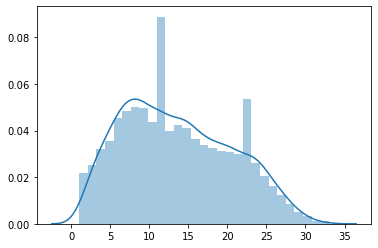

In [9]:
sentences = X_train.apply(lambda text: text.strip().split(' '))
print(sentences)
sentence_lengths = [len(s) for s in sentences]
sns.distplot(sentence_lengths)
print(f"\nMax sentences length: {max(sentence_lengths)}")

In [10]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
input_sequences = tokenizer.texts_to_sequences(sentences)
padded_input_sequences = np.array(pad_sequences(input_sequences, padding='post'))

padded_input_sequences[0:3]

array([[ 180,   17,  636,   39,    5,    7, 5048,    2,  719,   10,   31,
        2277, 1005,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   8, 3078,    9, 5049,  924, 5050,    2,   74,    6,  757,  491,
          43,   52,    5, 5051,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1341,  720,   13,   11,   45,    4,  335,  862,    2,    8,   36,
          59,   42,  118,    6,  863,   10,    6, 5052, 2278, 5053,   10,
        5054, 5055,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [11]:
labels = np.array(list(y_train))
labels

array([[ 5,  8],
       [38, 73],
       [38, 83],
       ...,
       [29, 33],
       [19, 45],
       [37, 41]])

In [12]:
# Some useful stats
unique_words = len(tokenizer.word_index) + 1 # +1 for padding token
max_sequence_length= max([len(seq) for seq in input_sequences])

----

In [92]:
embedding_size = 300

model = tf.keras.models.Sequential([
    Embedding(unique_words, embedding_size, input_length=max_sequence_length, mask_zero=True),
    Bidirectional(LSTM(100)),
    Dropout(0.2),
    Dense(50),
    Dense(2)
])

model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 33, 300)           5289000   
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 102       
Total params: 5,619,952
Trainable params: 5,619,952
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model.fit(padded_input_sequences, labels, batch_size=32, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
218/218 [==============================] - 46s 209ms/step - loss: 21.8629 - mae: 21.8629 - val_loss: 19.7298 - val_mae: 19.7298
Epoch 2/20
218/218 [==============================] - 42s 192ms/step - loss: 15.3285 - mae: 15.3285 - val_loss: 17.1595 - val_mae: 17.1595
Epoch 3/20
218/218 [==============================] - 41s 189ms/step - loss: 11.6278 - mae: 11.6278 - val_loss: 16.4869 - val_mae: 16.4869
Epoch 4/20
218/218 [==============================] - 43s 198ms/step - loss: 9.8573 - mae: 9.8573 - val_loss: 15.8625 - val_mae: 15.8625
Epoch 5/20
218/218 [==============================] - 41s 189ms/step - loss: 8.6867 - mae: 8.6867 - val_loss: 16.4302 - val_mae: 16.4302
Epoch 6/20
218/218 [==============================] - 42s 195ms/step - loss: 7.6034 - mae: 7.6034 - val_loss: 16.3439 - val_mae: 16.3439
Epoch 7/20
218/218 [==============================] - 43s 197ms/step - loss: 6.6974 - mae: 6.6974 - val_loss: 16.5813 - val_mae: 16.5813
Epoch 8/20
218/218 [===============

------

In [94]:
# Using the tokenizers (which was fitted on the training data) + pad to input length
val_sentences = X_test.apply(lambda text: text.strip().split(' '))
val_input_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded_input_sequences = np.array(pad_sequences(val_input_sequences, padding='post', maxlen=max_sequence_length))

val_labels = np.array(list(y_test))

pred = model.predict(val_padded_input_sequences)

In [95]:
tmp = pd.DataFrame({
    'text': X_test,
    'label': y_test,
    'pred': pred.tolist()}) 

def extract_text(row, ref_col):
    text = row.text
    start = int(row[ref_col][0])
    end = int(row[ref_col][1])
    
    start = np.max([0, start])
    end = np.max([0, end])
    
    return text[start:end + 1]

def compute_jaccard_sim(text1: str, text2: str) -> float: 
    a = set(text1.split()) 
    b = set(text2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

apply_jaccard_sim = lambda row: compute_jaccard_sim(row['label_text'], row['pred_text'])


tmp['label_text'] = tmp.apply(extract_text, args=['label'], axis=1)
tmp['pred_text'] = tmp.apply(extract_text, args=['pred'], axis=1)
tmp['jaccard_score'] = tmp.apply(apply_jaccard_sim, axis=1)

print(f"Average Jaccard score: {np.mean(tmp.jaccard_score)}")
tmp

Average Jaccard score: 0.17391146401889312


,text,label,pred,label_text,pred_text,jaccard_score
4951,is excited to be visited by her twin and best ...,"[0, 96]","[26.372861862182617, 50.69271469116211]",is excited to be visited by her twin and best ...,y her twin and best frien,0.200000
4825,It`s fun to see that glimpse of your life,"[4, 8]","[-0.09808400273323059, 18.685508728027344]",s fun,It`s fun to see th,0.166667
6741,"Wow, it`s so early. Just had the best conversa...","[33, 36]","[20.303844451904297, 38.09016799926758]",best,Just had the best c,0.200000
222,"am chillaxin after a busy BankHoliday, Hope ev...","[0, 88]","[40.51620864868164, 48.254215240478516]","am chillaxin after a busy BankHoliday, Hope ev...",ope everb,0.000000
5746,"Yeah, mine said 'That`s a nice picture' & gav...","[17, 39]","[28.724239349365234, 55.76601028442383]",'That`s a nice picture',ice picture' & gave me the r,0.100000
...,...,...,...,...,...,...
7319,Lindsay we are your spanish fansite and we lo...,"[1, 118]","[54.65126037597656, 73.59832000732422]",Lindsay we are your spanish fansite and we lov...,ww.ultimatelohan.org,0.000000
4707,You are clearly very busy Take care of yours...,"[52, 80]","[23.907936096191406, 38.990665435791016]",nd I am sure you will be fine,usy Take care o,0.000000
5939,I had a great time at the surprise party! We g...,"[8, 17]","[9.701421737670898, 49.36812973022461]",great time,reat time at the surprise party! We got h,0.100000
4192,Order Pizza from the Pizza Girl! We have to s...,"[61, 80]","[62.47593307495117, 77.67467498779297]",I love that new song,love that new s,0.500000


In [100]:
tmp.sort_values('jaccard_score', ascending=False).head(859)

,text,label,pred,label_text,pred_text,jaccard_score
2304,"by the way, just saw u on ellen yesterday. he...","[77, 93]","[77.27568817138672, 103.87899017333984]",u were awesome!!!,u were awesome!!!,1.000000
2874,awesome RONIN121,"[1, 7]","[1.1097440719604492, 7.067172050476074]",awesome,awesome,1.000000
5146,oi i love you,"[5, 14]","[5.540243148803711, 18.1188907623291]",i love you,i love you,1.000000
3080,I wish I had a dog,"[2, 5]","[1.8522449731826782, 5.05184268951416]",wish,wish,1.000000
4672,please?,"[0, 6]","[0.7791465520858765, 8.549139022827148]",please?,please?,1.000000
5973,great night,"[0, 10]","[-0.24506375193595886, 11.180622100830078]",great night,great night,1.000000
3238,I wish I was in va too,"[1, 6]","[1.9344028234481812, 9.269684791564941]",I wish,I wish I,1.000000
6171,_navarro I wish this area offered chinese food...,"[11, 14]","[11.27928352355957, 15.200697898864746]",wish,wish,1.000000
3121,I sure hope so!,"[1, 15]","[-2.638808488845825, 15.646470069885254]",I sure hope so!,I sure hope so!,1.000000
7040,On my shoot with Ron and Torey! Have lots of fun,"[45, 47]","[44.35158157348633, 56.291015625]",fun,fun,1.000000
